**Connect Google Drive with Google Collab**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
dataset_path = '/content/gdrive/MyDrive/pattern_FaceRecognition/faces'
nonfaces_dataset='/content/gdrive/MyDrive/pattern_FaceRecognition/non_faces'

**Generate the Data Matrix and the Label vector :**

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:

labels_y=[]
data=np.empty((0,10304),int)


# iterate over folders in that directory
for foldername in os.listdir(dataset_path):

    f = os.path.join(dataset_path, foldername)
    #now open each folder to iterate over the photos
    for filename in os.listdir(f):
      image_path = os.path.join(f, filename)
      labels_y.append(int(foldername[1:len(foldername)]))

      img = Image.open(image_path)
      numpydata = asarray(img).flatten()
      data=np.r_[data,[numpydata]]
print(type(data))


<class 'numpy.ndarray'>


In [ ]:
print(labels_y[0])
print(len(labels_y))
print(data.shape)
print(data[0])

4
400
(400, 10304)
[119 121 123 ...  75  79  78]


**Split the Dataset into Training and Test sets:**

In [ ]:
print(len(data[0]))

10304


In [ ]:
labels_train=[]
labels_test=[]
data_test=np.empty((0,10304),int)
data_train=np.empty((0,10304),int)
def split_data(data):

  labels_train=[]
  labels_test=[]
  data_train=np.empty((0,len(data[0])),int)
  data_test=np.empty((0,len(data[0])),int)

  for row in range(len(data)):
    if(row%2==0):
      data_test=np.r_[data_test,[data[row]]]
      labels_test.append(labels_y[row])
    else:
      data_train=np.r_[data_train,[data[row]]]
      labels_train.append(labels_y[row])
  return data_test,data_train,labels_test,labels_train


data_test, data_train, labels_test,labels_train=split_data(data)




print(data_test.shape)
print(data_train.shape)
print(len(labels_train))
print(len(labels_test))









(200, 10304)
(200, 10304)
200
200


In [ ]:
print(data_test.shape)
print(data_train.shape)
print(len(labels_train))
print(len(labels_test))

(200, 10304)
(200, 10304)
200
200


**split 70 :30**

In [ ]:
labels_train_70=[]
labels_test_30=[]
data_test_30=np.empty((0,10304),int)
data_train_70=np.empty((0,10304),int)
def split_data70_30(data):
  images_num=len(data)
  counter=0

  labels_train_70=[]
  labels_test_30=[]
  data_test_30=np.empty((0,10304),int)
  data_train_70=np.empty((0,10304),int)

  for row in range(len(data)):
    if(counter==10):
      counter=0
    if(counter<7):
      data_train_70=np.r_[data_train_70,[data[row]]]
      labels_train_70.append(labels_y[row])
      counter=counter+1
    elif(counter>= 7 and counter<10):
      data_test_30=np.r_[data_test_30,[data[row]]]
      labels_test_30.append(labels_y[row])
      counter=counter+1


  return data_test_30,data_train_70,labels_test_30,labels_train_70
data_test_30,data_train_70,labels_test_30,labels_train_70= split_data70_30(data)
print(data_test_30.shape)
print(data_train_70.shape)
print(labels_test_30)
print(labels_train_70)

(120, 10304)
(280, 10304)
[4, 4, 4, 8, 8, 8, 38, 38, 38, 39, 39, 39, 37, 37, 37, 6, 6, 6, 9, 9, 9, 7, 7, 7, 5, 5, 5, 40, 40, 40, 35, 35, 35, 31, 31, 31, 33, 33, 33, 30, 30, 30, 36, 36, 36, 3, 3, 3, 32, 32, 32, 34, 34, 34, 28, 28, 28, 29, 29, 29, 27, 27, 27, 25, 25, 25, 24, 24, 24, 2, 2, 2, 26, 26, 26, 19, 19, 19, 21, 21, 21, 20, 20, 20, 22, 22, 22, 23, 23, 23, 12, 12, 12, 15, 15, 15, 18, 18, 18, 14, 14, 14, 17, 17, 17, 1, 1, 1, 11, 11, 11, 13, 13, 13, 10, 10, 10, 16, 16, 16]
[4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 37, 37, 37, 37, 37, 37, 37, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 40, 40, 40, 40, 40, 40, 40, 35, 35, 35, 35, 35, 35, 35, 31, 31, 31, 31, 31, 31, 31, 33, 33, 33, 33, 33, 33, 33, 30, 30, 30, 30, 30, 30, 30, 36, 36, 36, 36, 36, 36, 36, 3, 3, 3, 3, 3, 3, 3, 32, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34, 34, 34, 34, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 27, 27, 

**KNeighborsClassifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn_classifier(data_training,label_training,data_testing,label_testing,k_range=[1,1]):
  accuracy_scores=[]
  k_best=0
  max_accuracy=0




  for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(data_training, label_training)
    #apply knn on the testing data
    generated_labels=neigh.predict(data_testing)
    #check the accuracy between the generated labels for the data testing and the actual test_labels
    current_accuracy=accuracy_score(generated_labels, label_testing)
    accuracy_scores.append(current_accuracy)
    if(current_accuracy>max_accuracy):
      k_best=k
      max_accuracy=current_accuracy
  print("best k is "+str(k_best )+" with accuracy "+str(max_accuracy))
  print("accuracy score are ")
  print(accuracy_scores)
  return k_best,max_accuracy









knn_classifier(data_train,labels_train,data_test,labels_test,[1,3,5,7])

best k is 1 with accuracy 0.925
accuracy score are 
[0.925, 0.87, 0.775, 0.73]


(1, 0.925)

**Simple Classifier**

In [ ]:
def get_accuracy(projected_train, projected_test, labels_train, labels_test,k=1):

#Use a simple classifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(projected_train, labels_train);
  y_pred = knn.predict(projected_test)
  accuracy = accuracy_score(labels_test, y_pred)*100
  #Report accuracy for the multiclass LDA
  print("Accuracy: {}%".format(accuracy))
  return accuracy,y_pred

**Classification Using PCA**

In [ ]:
import numpy as np


def choose_eigen_values(eigen_val_mat, alpha):
    total_sum = np.sum(eigen_val_mat)
    sum = 0
    counter = 0
    for eigen_value in eigen_val_mat:
        sum += eigen_value
        explained_var = sum/total_sum
        counter += 1
        if(explained_var >= alpha):
            break
    return counter

def extract_columns(mat, n):
    res = np.zeros((len(mat), n))
    for j in range(n):
        for i in range(len(mat)):
            res[i][j] = mat[i][len(mat[0])-j-1]

    return res

def pca_algo(data_mat, alpha):
    mean_mat = np.mean(data_mat, axis=0)
    z_mat = data_mat - mean_mat
    cov_mat = (1/len(data_mat)) * np.dot(np.transpose(z_mat), z_mat)
    eigen_val_mat, eigen_vector_mat = np.linalg.eigh(cov_mat)
    index = eigen_val_mat.argsort()[::-1]
    eigen_val_mat = eigen_val_mat[index]
    no_of_attr = choose_eigen_values(eigen_val_mat, alpha)
    print("Number of used Eigen Values: ", no_of_attr)
    selected_eigen_vec = extract_columns(eigen_vector_mat, no_of_attr)
    return selected_eigen_vec

print("Projection Done Successfully.....")

Projection Done Successfully.....


In [ ]:
def pca(data_train, labels_train, data_test, labels_test):
    alpha_values = [0.8, 0.85, 0.9, 0.95]
    acc=[]
    for alpha in alpha_values:
        print("\n alpha value is: ", alpha)
        projection_matrix = pca_algo(data_train, alpha)
        projected_data_train = np.dot(data_train, projection_matrix)
        projected_data_test = np.dot(data_test, projection_matrix)
        accuracy, y_pred = get_accuracy(projected_data_train, projected_data_test, labels_train, labels_test)
        acc.append(accuracy)
    return acc

#pca(data_train, labels_train, data_test, labels_test)

**adding non faces**

In [ ]:
٧pca(data_train_70,labels_train_70, data_test_30, labels_test_30)


 alpha value is:  0.8
Number of used Eigen Values:  41
Accuracy: 99.16666666666667%

 alpha value is:  0.85
Number of used Eigen Values:  61
Accuracy: 99.16666666666667%

 alpha value is:  0.9


0


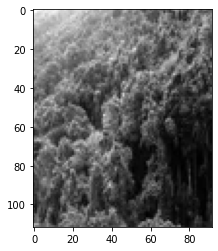

In [ ]:
from PIL import Image
import numpy as np
print(faces_nonfaces_testlabel[15])
my_img=np.reshape(faces_nonfaces_test[15],(112,92))
plt.imshow(my_img, cmap='gray')
plt.show()
plt.close()


# **Classification Using LDA**

In [ ]:
#Train data is 200*10304
#as well as we have 40 classes ,it will be taken 5 samples for training in each.

In [ ]:
def LDA_Alg(input_data,classes,samples):
  mean_vectors=[]
#modifying data
  counter=0;
  Training_Set=[];
  for u in range(classes):
    Training_Set.append(input_data[counter:counter+samples[u]]);
    counter=counter+samples[u];

#class means
  for i in range(classes):
    mean_vectors.append((np.mean(Training_Set[i],axis=0)).reshape(10304,1));


#the overall sample mean
  𝜇 =(np.mean(data, axis=0)).reshape(10304,1);

#between class scatter matrix
#   𝑆𝑏=∑𝑛𝑘(𝜇𝑘−𝜇)(𝜇𝑘−𝜇)𝑇
  Sb=np.zeros((10304,10304));
  for k in range(classes):
    𝜇𝑘_𝜇= np.subtract(mean_vectors[k], 𝜇)
    DOT1=np.dot(𝜇𝑘_𝜇, np.transpose(𝜇𝑘_𝜇));
    DOT2=np.dot(samples[k],DOT1);
    Sb=np.add(DOT2,Sb);

#center class matrices
  Z=[]
  for j in range(classes):
    Z.append(Training_Set[j]-np.transpose(mean_vectors[j]));

#within class scatter matrices
  S=np.zeros((10304,10304));
  for u in range(classes):
    Si=np.dot(np.transpose(Z[u]),Z[u]);
    S=np.add(Si,S);

#Compute 39 dominant eigenvectors &eigenvalues

  EigenValues ,EigenVectors=np.linalg.eigh(np.dot(np.linalg.inv(S), Sb));
  #print(EigenVectors)
  return EigenValues,EigenVectors




In [ ]:
#Projection of the training set,and test sets separately
#using the same projection matrix U.
def Projection_matrices(datatrain,datatest,EigenVectors,EigenValues,DominantEigenVector):
  #sorting eigenvalues and eigen vectors then cropping last dimension=>39 (dominant eigen vector mentioned)
  idx = EigenValues.argsort()[::-1]
  EigenValues = EigenValues[idx]
  EigenVectors = EigenVectors[:,idx]

  Projection_matrix=np.transpose(EigenVectors[:,:DominantEigenVector]);
  Projection_train=np.dot(datatrain,np.transpose(Projection_matrix));
  Projection_test=np.dot(datatest,np.transpose(Projection_matrix));
  print("Dimensions of projected training set from LDA : ",Projection_train.shape)
  print("Dimensions of projected testing set from LDA : ",Projection_test.shape)
  return Projection_train,Projection_test;




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def accuracy_multiclass_LDA(LDA_train,LDA_test,labelstrain,labelstest):

#Use a simple classifier
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(LDA_train, labelstrain);
  y_pred = knn.predict(LDA_test)
  accuracy = accuracy_score(labelstest, y_pred)*100
  #Report accuracy for the multiclass LDA
  print("Accuracy: {}%".format(accuracy))
  return accuracy,y_pred





In [ ]:
instances = np.full(40,5)
print(instances)
eigen_values, eigen_vectors = LDA_Alg(data_train,40, instances)
#print(eigen_vectors)


[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5]
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)


KeyboardInterrupt: ignored

In [ ]:
projectedTrain ,projectedTest=Projection_matrices(eigen_vectors,eigen_values,39);
accuracy_multiclass_LDA(projectedTrain,projectedTest)

Dimensions of projected training set from LDA :  (200, 39)
Dimensions of projected testing set from LDA :  (200, 39)
Accuracy: 92.0%


(92.0,
 array([ 4,  4,  4,  4,  4,  8, 38,  8,  8, 32, 38, 38, 38, 38, 38, 39, 39,
        39, 39, 39, 37, 37, 37, 37, 37,  6,  6,  6,  6,  6,  9,  9,  9,  9,
         9,  7,  7,  7,  7,  7,  5, 40,  5,  5,  5, 40, 40, 40, 40, 40, 15,
        35, 35, 15, 25, 31, 31, 31, 31, 31, 33, 33, 33, 33, 33, 30, 30, 30,
        30, 30, 36,  2, 19,  2, 36,  3,  3,  3,  3,  3, 32, 32, 32, 32, 32,
        34, 34, 34, 34, 34, 28, 28, 37, 28, 28, 29, 29, 29, 39, 29, 27, 27,
        27, 27, 27, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24,  2,  2,  2,  2,
         2, 26, 26, 26, 26, 26, 19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 20,
        20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 12, 12, 12,
        12, 12, 15, 15, 15, 15, 15, 18, 18, 18, 18, 18, 14, 14, 14, 14, 14,
        17,  3, 17, 17,  3,  1,  8,  1,  1,  1, 11, 11, 11, 11, 11, 13, 13,
        13, 13, 13, 10, 10,  4, 17, 10, 16, 16, 16, 16, 16]))

In [ ]:
# BONUS
# Change the number of instances per subject to be 7 and keep 3 instances per subject for testing.
instances_bonus = np.full(40,7)
eigen_values_bonus, eigen_vectors_bonus = LDA_Alg(data_train_70,40, instances_bonus)
print(eigen_vectors_bonus)
projectedTrain_bonus ,projectedTest_bonus= Projection_matrices(data_train_70,data_test_30,eigen_vectors_bonus,eigen_values_bonus,39);
accuracy_multiclass_LDA(projectedTrain_bonus,projectedTest_bonus,labels_train_70,labels_test_30)

[[ 0.02172568 -0.01975552  0.01589923 ... -0.01380338  0.01886518
   0.02155546]
 [ 0.02159649 -0.01953236  0.01560253 ... -0.01395298  0.01896639
   0.02154572]
 [ 0.02165199 -0.01991135  0.01618209 ... -0.01322537  0.01837414
   0.02123934]
 ...
 [ 0.01179191  0.01147681  0.01526491 ...  0.01559339  0.01135227
  -0.01167793]
 [-0.0009412  -0.00089729 -0.00081681 ... -0.00123259 -0.0008988
   0.00094805]
 [-0.00065109 -0.00017204  0.00334629 ...  0.00258943 -0.00018218
   0.00065075]]
Dimensions of projected training set from LDA :  (280, 39)
Dimensions of projected testing set from LDA :  (120, 39)
Accuracy: 99.16666666666667%


(99.16666666666667,
 array([ 4,  4,  4,  8,  8,  8, 38, 38, 38, 39, 39, 39, 37, 37, 37,  6,  6,
         6,  9,  9,  9,  7,  7,  7,  5,  5,  5, 40, 40, 40, 35, 35, 35, 31,
        31, 31, 33, 33, 33, 30, 30, 30, 36, 36, 36,  3,  3,  3, 32, 32, 32,
        34, 34, 34, 28, 28, 28, 29, 29, 29, 27, 27, 27, 25, 25, 25, 24, 24,
        24,  2,  2,  2, 26, 26, 26, 19, 19, 19, 21, 21, 21, 20, 20, 20, 22,
        22, 22, 23, 23, 23, 12, 12, 12, 15, 15, 15, 18, 18, 18, 14, 14, 14,
        17, 17, 17, 16,  1,  1, 11, 11, 11, 13, 13, 13, 10, 10, 10, 16, 16,
        16]))

## **Non-Face Images **

In [ ]:
import cv2
# iterate over folders in that directory
labels_nonface=[]
data_nonface=np.empty((0,10304),int)
for foldername in os.listdir(nonfaces_dataset):

    f = os.path.join(nonfaces_dataset, foldername)
    #now open each folder to iterate over the photos
    for filename in os.listdir(f):
      image_path = os.path.join(f, filename)
      labels_nonface.append((foldername[1:len(foldername)]))

      img = Image.open(image_path)
      img=img.resize((92, 112)).convert('L')

      numpydata = asarray(img).flatten()

      data_nonface=np.r_[data_nonface,[numpydata]]
print(data_nonface.shape)

(400, 10304)


In [ ]:
labels_nonface_train=[]
labels_nonface_test=[]
data_nonface_train=np.empty((0,10304),int)
data_nonface_test=np.empty((0,10304),int)
for row in range(400):

  if(row%2==0): #even row so it test data
    data_nonface_test=np.r_[data_nonface_test,[data_nonface[row]]]
    labels_nonface_test.append(labels_nonface[row])
  else:
    data_nonface_train=np.r_[data_nonface_train,[data_nonface[row]]]
    labels_nonface_train.append(labels_nonface[row])

In [ ]:
print(labels_nonface_train)
print(labels_nonface_test)
print(data_nonface_train.shape)
print(data_nonface_test.shape)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

**generate mixed data matrix of faces and non- faces**

In [ ]:
def split_datafor_mixed(data):

  data_train=np.empty((0,len(data[0])),int)
  data_test=np.empty((0,len(data[0])),int)

  for row in range(len(data)):
    if(row%2==0):
      data_test=np.r_[data_test,[data[row]]]

    else:
      data_train=np.r_[data_train,[data[row]]]

  return data_test[:,:10304],data_train[:,:10304],data_test[:,10304],data_train[:,10304]


In [ ]:
#faces labels has 1 value,non face has 0 value
DiffNonfaces_faces_datasetsTr=[]
DiffNonfaces_faces_datasetsTe=[]
DiffNonfaces_faces_datasetsLTr=[]
DiffNonfaces_faces_datasetsLTe=[]

for i in range(1,5):

  face_labelvector=np.full(400,1)
  nonface_labelvector=np.full(i*100,0)

  face_matrix_withlabels=np.column_stack((data,face_labelvector.T))
  #changing number of nonfaces included in the dataset (100,200,300,400)
  nonface_matrix_with_label=np.column_stack((data_nonface[:i*100][:],nonface_labelvector[:i*100][:].T))
  print(data.shape)
  print(face_matrix_withlabels.shape)
#now join two matricies
  mixed_faces_nonfaces=np.concatenate((face_matrix_withlabels, nonface_matrix_with_label))
  print(mixed_faces_nonfaces.shape)
  np.random.shuffle(mixed_faces_nonfaces)
  print(mixed_faces_nonfaces.shape)
  faces_nonfaces_train,faces_nonfaces_test,faces_nonfaces_trainlabel,faces_nonfaces_testlabel=split_datafor_mixed(mixed_faces_nonfaces)

  print(faces_nonfaces_train.shape)
  print(faces_nonfaces_test.shape)
  print(faces_nonfaces_trainlabel.shape)
  print(faces_nonfaces_testlabel.shape)

  DiffNonfaces_faces_datasetsTr.append(faces_nonfaces_train)
  DiffNonfaces_faces_datasetsTe.append(faces_nonfaces_test)
  DiffNonfaces_faces_datasetsLTr.append(faces_nonfaces_trainlabel)
  DiffNonfaces_faces_datasetsLTe.append(faces_nonfaces_testlabel)






(400, 10304)
(400, 10305)
(500, 10305)
(500, 10305)
(250, 10304)
(250, 10304)
(250,)
(250,)
(400, 10304)
(400, 10305)
(600, 10305)
(600, 10305)
(300, 10304)
(300, 10304)
(300,)
(300,)
(400, 10304)
(400, 10305)
(700, 10305)
(700, 10305)
(350, 10304)
(350, 10304)
(350,)
(350,)
(400, 10304)
(400, 10305)
(800, 10305)
(800, 10305)
(400, 10304)
(400, 10304)
(400,)
(400,)


**Test Cases : Success OR Failure**

In [ ]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def testcases(LDA_testlabels,real_labels,data_matrix):
  success_index=[]
  fail_index=[]

  for i in range(len(LDA_testlabels)):
    if(LDA_testlabels[i]==real_labels[i]):
      success_index.append(i)
    else:
      fail_index.append(i)
  print("success length is "+ str(len(success_index)))
  print("failure length is "+ str(len(fail_index)))
  print("Success test cases ")
  for x in range(round(len(success_index)/10)) :
    random_indexof_sucess=(random.randint(0,len(success_index)))
    if(LDA_testlabels[success_index[random_indexof_sucess]]==1):
      print("Face")
    else:
      print("Non Face")
    my_img=np.reshape(data_matrix[success_index[random_indexof_sucess]],(112,92))
    plt.imshow(my_img, cmap='gray')
    plt.show()
    plt.close()
  print("Failure test cases :")
  for x in range(round(len(fail_index)/10)) :

    random_indexof_fail=(random.randint(0,len(fail_index)))
    if(LDA_testlabels[fail_index[random_indexof_fail]]==1):
      print("Face")
    else:
     print("Non Face")
    my_img=np.reshape(data_matrix[fail_index[random_indexof_fail]],(112,92))
    plt.imshow(my_img, cmap='gray')
    plt.show()
    plt.close()

  labels = 'Success', 'failure'
  sizes = [len(success_index), len(fail_index)]


  explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

  fig, ax = plt.subplots()
  ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)






In [ ]:
instances = np.array([200,100])
eigen_values, eigen_vectors = LDA_Alg(DiffNonfaces_faces_datasetsTr[1],2 , instances)
projectedTrain ,projectedTest=Projection_matrices(DiffNonfaces_faces_datasetsTr[1],DiffNonfaces_faces_datasetsTe[1],eigen_vectors,eigen_values,1 );
accuracy,pred=accuracy_multiclass_LDA(projectedTrain,projectedTest,DiffNonfaces_faces_datasetsLTr[1],DiffNonfaces_faces_datasetsLTe[1])



success length is 272
failure length is 28
Success test cases 
Face


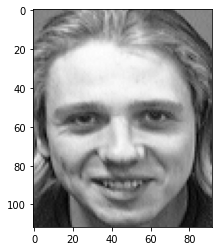

Non Face


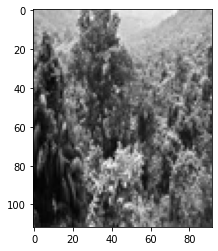

Non Face


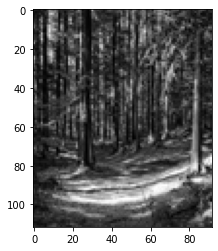

Non Face


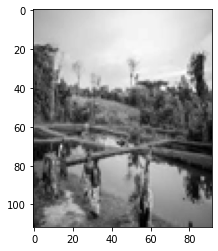

Face


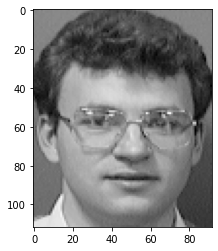

Non Face


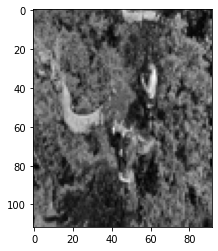

Face


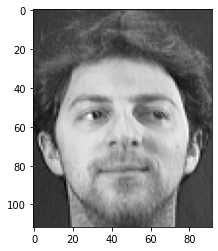

Face


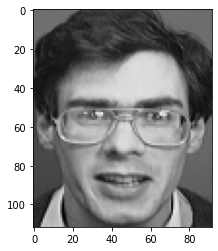

Face


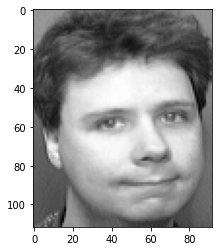

Face


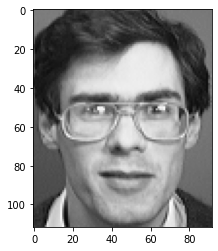

Face


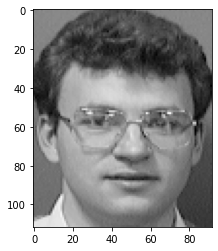

Face


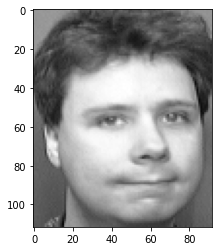

Non Face


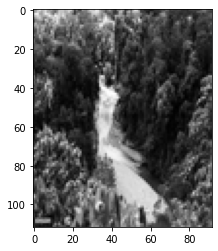

Face


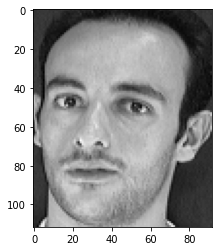

Face


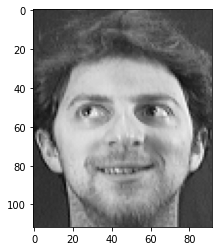

Non Face


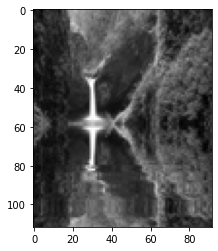

Face


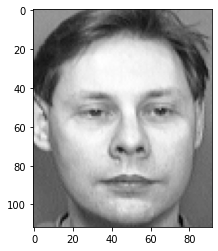

Non Face


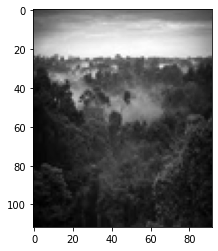

Non Face


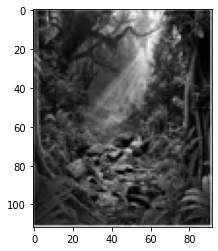

Non Face


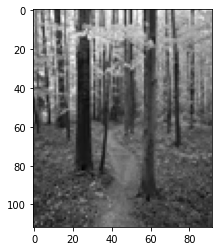

Non Face


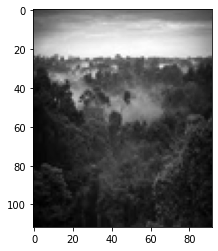

Face


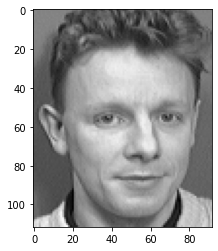

Face


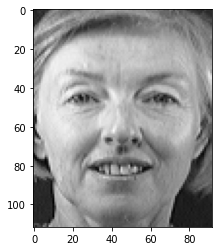

Non Face


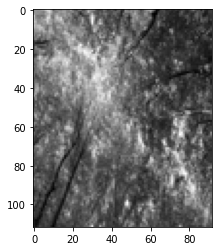

Face


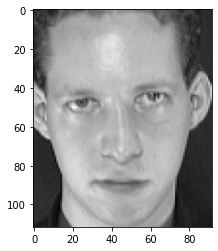

Face


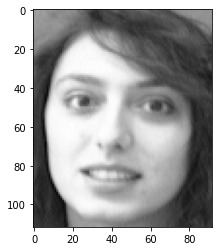

Non Face


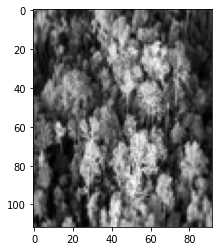

Failure test cases :
Face


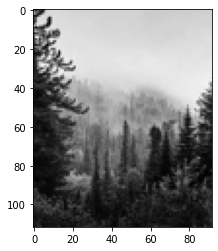

Non Face


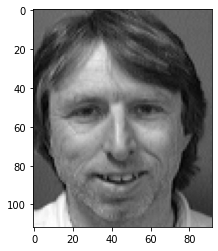

Face


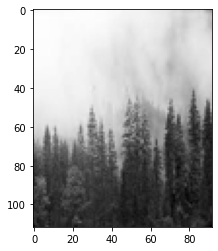

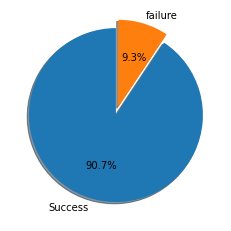

In [ ]:
testcases(pred,DiffNonfaces_faces_datasetsLTe[1],DiffNonfaces_faces_datasetsTe[1])


In [ ]:
#How  many  dominant  eigenvectors  will  you  use  for  the  LDA solution?
def NoDominantEigenVectors(Xtrain,Xtest,Ytrain,Ytest,eigenvector,eigenvalues):
  BestAccuracy=0;
  Accuracy_Table=[]        #to store accuracy of each corresponding eigenvectors number
  EigenVectors_Number=[]   #to store different eigenvectors number
  for i in range(1,4):
    projTrain,projTest=Projection_matrices(eigenvector,eigenvalues,i);
    accuracy,y_pred=accuracy_multiclass_LDA(projTrain,projTest)
    Accuracy_Table.append(accuracy)
    EigenVectors_Number.append(i)
    if(accuracy>BestAccuracy):
      BestAccuracy=accuracy
      dominant_EigenVectors_Nu=i
      best_y_pred=y_pred

    plt.plot(EigenVectors_Number,Accuracy_Table)
    plt.xlabel('Number of EigenVectors')
    plt.ylabel('Accuracy')
    plt.show()
    return best_y_pred, BestAccuracy ,dominant_EigenVectors_Nu


***Plot the accuracy vs the number of non-faces image using LDA***

In [ ]:
accuracies=[]
for j in range(1,5):
  instances = np.array([200,50+(j-1)*50])
  eigen_values, eigen_vectors = LDA_Alg(DiffNonfaces_faces_datasetsTr[j-1],2 , instances)
  projectedTrain ,projectedTest=Projection_matrices(DiffNonfaces_faces_datasetsTr[j-1],DiffNonfaces_faces_datasetsTe[j-1],eigen_vectors,eigen_values,1 );
  print("Accuracy of {} non-faces and 400 faces is:".format(j*100))
  accuracy,pred=accuracy_multiclass_LDA(projectedTrain,projectedTest,DiffNonfaces_faces_datasetsLTr[j-1],DiffNonfaces_faces_datasetsLTe[j-1])
  accuracies.append(accuracy/100)


Dimensions of projected training set from LDA :  (250, 1)
Dimensions of projected testing set from LDA :  (250, 1)
Accuracy of 100 non-faces and 400 faces is:
Accuracy: 87.2%
Dimensions of projected training set from LDA :  (300, 1)
Dimensions of projected testing set from LDA :  (300, 1)
Accuracy of 200 non-faces and 400 faces is:
Accuracy: 84.66666666666667%
Dimensions of projected training set from LDA :  (350, 1)
Dimensions of projected testing set from LDA :  (350, 1)
Accuracy of 300 non-faces and 400 faces is:
Accuracy: 88.85714285714286%
Dimensions of projected training set from LDA :  (400, 1)
Dimensions of projected testing set from LDA :  (400, 1)
Accuracy of 400 non-faces and 400 faces is:
Accuracy: 86.5%


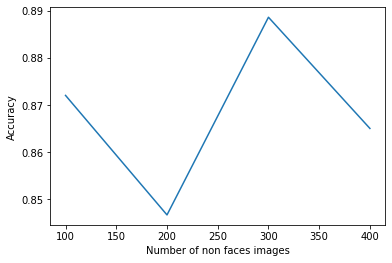

In [ ]:
#Plotting the accuracy vs the number of non-faces image
NON_FACES=[100,200,300,400]
plt.plot(NON_FACES,accuracies)
plt.xlabel("Number of non faces images")
plt.ylabel("Accuracy")
plt.show()

**Plot the accuracy vs the number of non-faces image using PCA**

In [ ]:

def pca_faces_non_faces(faces_non_faces_train, faces_non_faces_test, faces_non_faces_labels_train, faces_non_faces_labels_test):
    Accuracy_Array_alpha=[]
    accuracy_08=[]
    accuracy_085=[]
    accuracy_09=[]
    accuracy_095=[]
    for k in range(1, 5):
        train_set = faces_non_faces_train[k-1]
        test_set = faces_non_faces_test[k-1]
        labels_train_set = faces_non_faces_labels_train[k-1]
        labels_test_set = faces_non_faces_labels_test[k-1]
        print("\n data with {} faces ".format(round(400/(400+k*100), 3)), " {} and non-faces".format(round((k*100)/(400+k*100), 3)))
        Accuracy_Array_alpha=pca(train_set, labels_train_set, test_set, labels_test_set)
        accuracy_08.append(Accuracy_Array_alpha[0])
        accuracy_085.append(Accuracy_Array_alpha[1])
        accuracy_09.append(Accuracy_Array_alpha[2])
        accuracy_095.append(Accuracy_Array_alpha[3])
    return accuracy_08,accuracy_085,accuracy_09,accuracy_095

acc1=[]
acc2=[]
acc3=[]
acc4=[]
acc1,acc2,acc3,acc4=pca_faces_non_faces(DiffNonfaces_faces_datasetsTr, DiffNonfaces_faces_datasetsTe, DiffNonfaces_faces_datasetsLTr, DiffNonfaces_faces_datasetsLTe)


 data with 0.8 faces   0.2 and non-faces

 alpha value is:  0.8
Number of used Eigen Values:  36
Accuracy: 98.4%

 alpha value is:  0.85
Number of used Eigen Values:  54
Accuracy: 98.4%

 alpha value is:  0.9
Number of used Eigen Values:  82
Accuracy: 97.6%

 alpha value is:  0.95
Number of used Eigen Values:  130
Accuracy: 97.6%

 data with 0.667 faces   0.333 and non-faces

 alpha value is:  0.8
Number of used Eigen Values:  38
Accuracy: 98.0%

 alpha value is:  0.85
Number of used Eigen Values:  59
Accuracy: 97.66666666666667%

 alpha value is:  0.9
Number of used Eigen Values:  91
Accuracy: 96.66666666666667%

 alpha value is:  0.95
Number of used Eigen Values:  148
Accuracy: 96.66666666666667%

 data with 0.571 faces   0.429 and non-faces

 alpha value is:  0.8


In [ ]:
#Plotting the accuracy vs the number of non-faces image from PCA
NON_FACES=[100,200,300,400]

plt.plot(NON_FACES,acc1)
plt.title("PCA with alpha=0.8")
plt.xlabel("Number of non faces images")
plt.ylabel("Accuracy")
plt.show()

plt.plot(NON_FACES,acc2)
plt.title("PCA with alpha=0.85")
plt.xlabel("Number of non faces images")
plt.ylabel("Accuracy")
plt.show()

plt.plot(NON_FACES,acc3)
plt.title("PCA with alpha=0.9")
plt.xlabel("Number of non faces images")
plt.ylabel("Accuracy")
plt.show()

plt.plot(NON_FACES,acc4)
plt.title("PCA with alpha=0.95")
plt.xlabel("Number of non faces images")
plt.ylabel("Accuracy")
plt.show()